# Set up

In [4]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import simfin as sf
from simfin.names import *
from IPython.display import display
import datetime
%matplotlib inline

#set the local directory where data-files are stored
sf.set_data_dir('C:/Users/think/Desktop/UVA/2020 Spring/STAT 4996 Capstone\python code/simfin_data/')

# 一个cell显示所有output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Set up API key
sf.set_api_key(api_key='free')

# Seaborn set plotting style.
sns.set_style("whitegrid")

#display all columns
pd.set_option('display.max_columns', None)

# Define functions

In [5]:
#calculate the proportion of non-missing value in each column
def prop_nonmissing(df):
    df2 = df.reset_index().copy()
    output = pd.DataFrame(index = df2.columns)
    nomiss_prop = []
    for c in df2.columns:
        nomiss_prop.append(round((1-(df2.loc[:,c].isnull().sum()/len(df2.loc[:,c])))*100,2))
    output['Prop'] = nomiss_prop
    return output

# Loading Data

## income statement

In [6]:
#load in entire annual income statement data
df_income_a = sf.load_income(variant='annual', market='us')
#banks only
df_income_a_bank  = sf.load_income_banks(variant='annual', market='us')
#insurance companies only
df_income_a_ins = df = sf.load_balance_insurance(variant='annual', market='us')

#load quarter data
df_income_q = sf.load_income(variant='quarterly', market='us')
df_income_q_bank  = sf.load_income_banks(variant='quarterly', market='us')
df_income_q_ins = df = sf.load_balance_insurance(variant='quarterly', market='us')

#load ttm data

df_income_ttm = sf.load_income(variant='ttm', market='us')
df_income_ttm_bank  = sf.load_income_banks(variant='ttm', market='us')
df_income_ttm_ins = df = sf.load_balance_insurance(variant='ttm', market='us')


Dataset "us-income-annual" on disk (7 days old).
- Loading from disk ... Done!
Dataset "us-income-banks-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-income-quarterly" on disk (7 days old).
- Loading from disk ... Done!
Dataset "us-income-banks-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-income-ttm" on disk (7 days old).
- Loading from disk ... Done!
Dataset "us-income-banks-ttm" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-ttm" on disk (1 days old).
- Loading from disk ... Done!


## balance sheet

In [7]:
#load in entire annual balance sheet data 
df_balance_a = sf.load_balance(variant='annual', market='us')
#banks only
df_balance_a_bank = sf.load_balance_banks(variant='annual', market='us')
#insurance companies only
df_balance_a_ins = sf.load_balance_insurance(variant='annual', market='us')

#load quartly 
df_balance_q = sf.load_balance(variant='quarterly', market='us')
#banks only
df_balance_q_bank = sf.load_balance_banks(variant='quarterly', market='us')
#insurance companies only
df_balance_q_ins = sf.load_balance_insurance(variant='quarterly', market='us')

#load ttm 
df_balance_ttm = sf.load_balance(variant='ttm', market='us')
#banks only
df_balance_ttm_bank = sf.load_balance_banks(variant='ttm', market='us')
#insurance companies only
df_balance_ttm_ins = sf.load_balance_insurance(variant='ttm', market='us')

Dataset "us-balance-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-banks-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-banks-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-ttm" on disk (5 days old).
- Loading from disk ... Done!
Dataset "us-balance-banks-ttm" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-balance-insurance-ttm" on disk (1 days old).
- Loading from disk ... Done!


## cash flow

In [8]:
#load in entire annual balance sheet data 
df_cashflow_a = sf.load_cashflow(variant='annual', market='us')
#banks only
df_cashflow_a_bank = sf.load_cashflow_banks(variant='annual', market='us')
#insurance companies only
df_cashflow_a_ins = sf.load_cashflow_insurance(variant='annual', market='us')

#load quarterly 
df_cashflow_q = sf.load_cashflow(variant='quarterly', market='us')
#banks only
df_cashflow_q_bank = sf.load_cashflow_banks(variant='quarterly', market='us')
#insurance companies only
df_cashflow_q_ins = sf.load_cashflow_insurance(variant='quarterly', market='us')

#load ttm 
df_cashflow_ttm = sf.load_cashflow(variant='ttm', market='us')
#banks only
df_cashflow_ttm_bank = sf.load_cashflow_banks(variant='ttm', market='us')
#insurance companies only
df_cashflow_ttm_ins = sf.load_cashflow_insurance(variant='ttm', market='us')

Dataset "us-cashflow-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-banks-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-insurance-annual" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" on disk (5 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-banks-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-insurance-quarterly" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-ttm" on disk (5 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-banks-ttm" on disk (1 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-insurance-ttm" on disk (1 days old).
- Loading from disk ... Done!


## Shareprice 

In [9]:
df_prices = sf.load_shareprices(variant='daily', market='us')
df_prices_latest = sf.load_shareprices(variant='latest', market='us')

Dataset "us-shareprices-daily" on disk (6 days old).
- Loading from disk ... Done!
Dataset "us-shareprices-latest" on disk (6 days old).
- Loading from disk ... Done!


## Companies details

In [10]:
comp = sf.load_companies(index=TICKER, market='us')
industry = sf.load_industries(index = INDUSTRY_ID)

Dataset "us-companies" on disk (6 days old).
- Loading from disk ... Done!
Dataset "industries" on disk (6 days old).
- Loading from disk ... Done!


# Date exploration

## Data overview

### Income Statement 

结论：


1. income dataset 不包含bank和insurance
2. banks 和 insurance company的数量极少，且和普通公司业务模式不同，可以暂时排除


In [88]:
#get all column names
sf.info_datasets('income')
display(df_income_a.reset_index().columns)

Dataset:  income
Variants: annual, annual-full, quarterly, quarterly-full, ttm, ttm-full
Markets:  de, us
Columns:  (The * marks data that requires a paid subscription)
- "Ticker" TICKER
- "SimFinId" SIMFIN_ID
- "Currency" CURRENCY
- "Fiscal Year" FISCAL_YEAR
- "Fiscal Period" FISCAL_PERIOD
- "Report Date" REPORT_DATE
- "Publish Date" PUBLISH_DATE
- "Shares (Basic)" SHARES_BASIC
- "Shares (Diluted)" SHARES_DILUTED
* "Source" SOURCE
- "Revenue" REVENUE
* "Sales & Services Revenue" SALES_SERVICES_REVENUE
* "Financing Revenue" FINANCING_REVENUE
* "Other Revenue" OTHER_REVENUE
- "Cost of Revenue" COST_REVENUE
* "Cost of Goods & Services" CGS, COST_GOODS_SERVICES
* "Cost of Financing Revenue" COST_FINANCING_REVENUE
* "Cost of Other Revenue" COST_OTHER_REVENUE
- "Gross Profit" GROSS_PROFIT
* "Other Operating Income" OTHER_OP_INCOME
- "Operating Expenses" OPERATING_EXPENSES, OP_EXP
- "Selling, General & Administrative" SELLING_GEN_ADMIN, SGA
* "Selling & Marketing" SELLING_MARKETING
* "Genera

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Research & Development',
       'Depreciation & Amortization', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [12]:
#everything included
df_income_a.shape #(14611, 25)
df_income_a.reset_index()['Ticker'].nunique() #1909 stocks
df_income_a.reset_index()['SimFinId'].nunique() #same as above 

#banks only
df_income_a_bank.shape #(596, 19)
df_income_a_bank.reset_index()['Ticker'].nunique() #69 stocks
df_income_a_bank.reset_index()['SimFinId'].nunique() #same as above 

#insurance company
df_income_a_ins.shape #(326, 23)
df_income_a_ins.reset_index()['Ticker'].nunique() #36 stocks
df_income_a_ins.reset_index()['SimFinId'].nunique() #same as above 

(14611, 25)

1909

1909

(596, 19)

69

69

(326, 23)

36

36

In [13]:
#看income dataset是否包含banks 和 insurance

intersection = set(df_income_a['SimFinId']) & set(df_income_a_bank['SimFinId'])
intersection #无重合

intersection2 = set(df_income_a['SimFinId']) & set(df_income_a_ins['SimFinId'])
intersection2 #无重合

set()

set()

### Balance Sheet

抛弃bank和insurance company

In [14]:
#display data
display(df_income_a.head())

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-10-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-20   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                    Shares (Basic)  Shares (Diluted)       Revenue  \
Ticker Report Date                                                   
A      2008-10-31      363000000.0       371000000.0  5.774000e+09   
       2009-10-31      346000000.0       346000000.0  4.481000e+09   
       2010-10-31      347000000.0       353000000.0  5.444000e+09   
       2011-10-31      347000000.0       355000000.0  6.615000e+09   
       2012-10-31      348000000.0       353000000.0  6.858000e+09   

                    Cost of Revenue  Gross Profit  Operating Expenses  \
Ticker Report Date                                                      
A      2008-10-31     -2.578000e+09  3.196000e+09       -2.401000e+09   
       2009-10-31     -2.189000e+09  2.292000e+09       -2.245000e+09   
       2010-10-31     -2.514000e+09  2.930000e+09       -2.364000e+09   
       2011-10-31     -3.086000e+09  3.529000e+09       -2.458000e+09   
       2012-10-31     -3.254000e+09  3.604000e+09       -2.485000e+09   

                    Selling, General & Administrative  Research & Development  \
Ticker Report Date                                                              
A      2008-10-31                       -1.697000e+09            -704000000.0   
       2009-10-31                       -1.603000e+09            -642000000.0   
       2010-10-31                       -1.752000e+09            -612000000.0   
       2011-10-31                       -1.809000e+09            -649000000.0   
       2012-10-31                       -1.817000e+09            -668000000.0   

                    Depreciation & Amortization  Operating Income (Loss)  \
Ticker Report Date                                                         
A      2008-10-31                           NaN             7.950000e+08   
       2009-10-31                           NaN             4.700000e+07   
       2010-10-31                           NaN             5.660000e+08   
       2011-10-31                           NaN             1.071000e+09   
       2012-10-31                           NaN             1.119000e+09   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   
       2012-10-31                   -76000000.0            -92000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2008-10-31                    815000000                      0.0   
       2009-10-31                      7000000                      0.0   
       2010-10-31                    560000000              132000000.0   
       2011-10-31                   1032000000                      NaN   
       2012-10-31                   1043000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -3

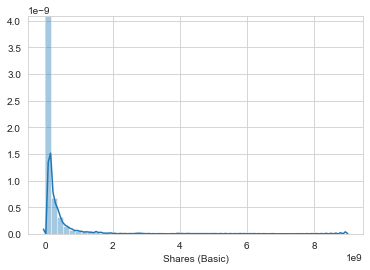

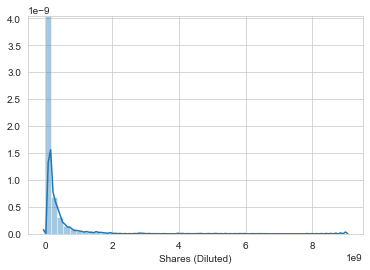

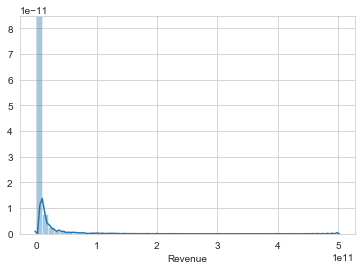

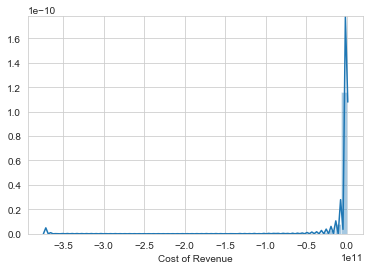

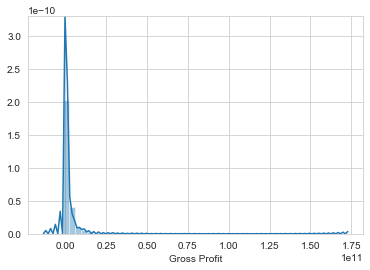

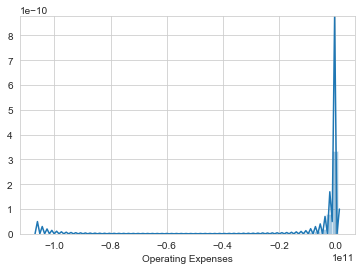

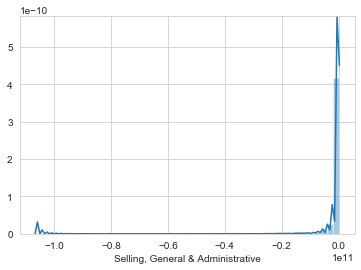

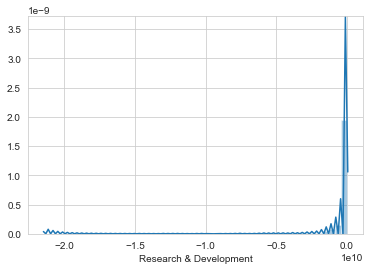

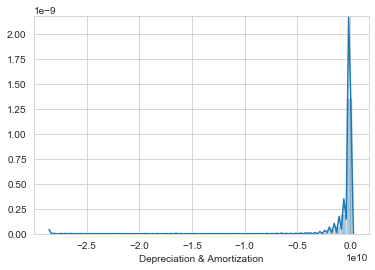

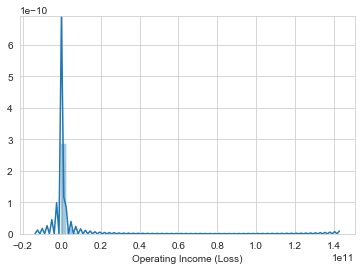

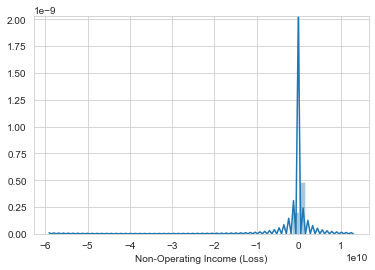

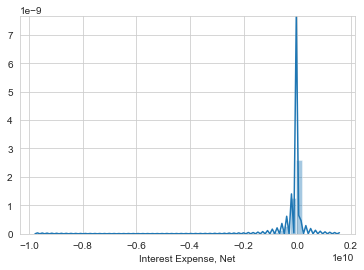

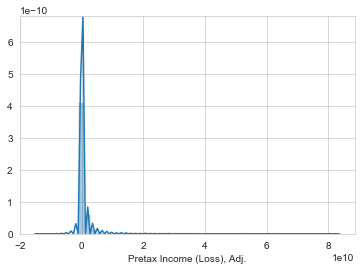

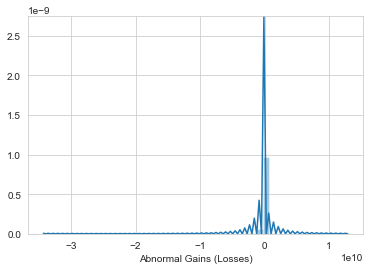

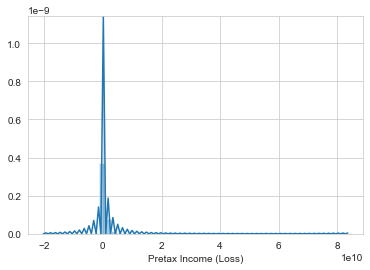

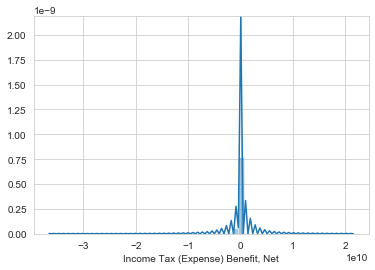

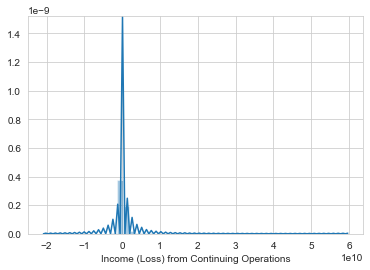

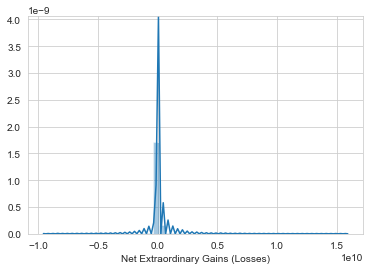

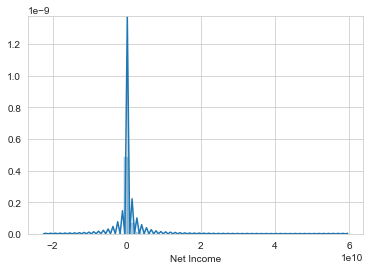

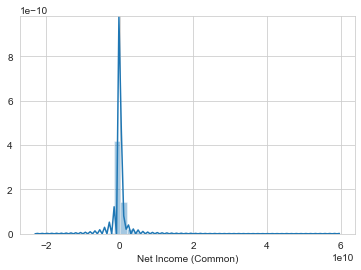

In [16]:
#plot distribution for each column
drop_c =['Ticker','Report Date','SimFinId','Currency','Fiscal Year','Fiscal Period', 'Publish Date' ]
df = df_income_a.reset_index().drop(drop_c,axis=1)
for i, col in enumerate(df.columns):
    if isinstance(df[col], object):
        __ = plt.figure(i)
        _ = sns.distplot(df[col])
        plt.show()

## Missing Values

In [81]:
#check non-missing value % of income statement
prop_nonmissing(df_income_a)

,Prop
Ticker,100.00
Report Date,100.00
SimFinId,100.00
Currency,100.00
Fiscal Year,100.00
Fiscal Period,100.00
Publish Date,100.00
Shares (Basic),97.17
Shares (Diluted),96.67
Revenue,98.45


In [85]:
#balance sheet
prop_nonmissing(df_balance_a)

,Prop
Ticker,100.00
Report Date,100.00
SimFinId,100.00
Currency,100.00
Fiscal Year,100.00
Fiscal Period,100.00
Publish Date,100.00
Shares (Basic),94.19
Shares (Diluted),93.75
"Cash, Cash Equivalents & Short Term Investments",99.76


In [86]:
#cash flow
prop_nonmissing(df_cashflow_a)

,Prop
Ticker,100.00
Report Date,100.00
SimFinId,100.00
Currency,100.00
Fiscal Year,100.00
Fiscal Period,100.00
Publish Date,100.00
Shares (Basic),97.20
Shares (Diluted),96.71
Net Income/Starting Line,99.67


可以drop：Net Extraordinary Gains (Losses)	,Abnormal Gains (Losses), Depreciation， too much missing value and are not useful for calculating financial ratio

R&D是否需要drop？或许R&D投资高的企业profit margin比较高
Net extraordinary gain 和 loss或许可以做成categorical variable

In [83]:
#check company data
prop_nonmissing(comp)
prop_nonmissing(industry)

,Prop
Ticker,100.00
SimFinId,100.00
Company Name,100.00
IndustryId,91.19


,Prop
IndustryId,100.0
Sector,100.0
Industry,100.0


## Join Data

In [30]:
#总共有2067个公司
comp.reset_index().columns
comp.reset_index()[['SimFinId']].nunique() 
comp.reset_index()[['Ticker']].nunique() 

#总共有12个sector， 71个industry
industry.reset_index().columns
industry.reset_index()[['Industry']].nunique()
industry.reset_index()[['Sector']].nunique()

Index(['Ticker', 'SimFinId', 'Company Name', 'IndustryId'], dtype='object')

SimFinId    2067
dtype: int64

Ticker    2067
dtype: int64

Index(['IndustryId', 'Sector', 'Industry'], dtype='object')

Industry    71
dtype: int64

Sector    12
dtype: int64

In [121]:
#join income with company
df_income2 = df_income_a.reset_index(level = 'Report Date')
df_merge = pd.merge(comp,df_income2,right_index=True, left_index=True, how = 'left', suffixes=('','_right')).reset_index()
df_merge = df_merge.drop(df_merge.columns[df_merge.columns.str.endswith('right')],axis = 1)
df_merge.head(2)

,Ticker,SimFinId,Company Name,IndustryId,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0,2008-10-31,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0
1,A,45846,AGILENT TECHNOLOGIES INC,106001.0,2009-10-31,USD,2009.0,FY,2009-12-21,346000000.0,346000000.0,4.481000e+09,-2.189000e+09,2.292000e+09,-2.245000e+09,-1.603000e+09,-642000000.0,NaN,47000000.0,-40000000.0,-59000000.0,7000000.0,0.0,7000000.0,-38000000.0,-31000000.0,NaN,-31000000.0,-31000000.0


In [124]:
#join in industry
indus = industry.reset_index().copy()
indus['IndustryId']= indus['IndustryId'].astype('float')
df_merge2 = pd.merge(indus,df_merge,on='IndustryId', how = 'left', suffixes=('','_right'))
df_merge2 = df_merge2.drop(df_merge2.columns[df_merge2.columns.str.endswith('right')],axis = 1)
df_merge2 = df_merge2.set_index('Ticker')
df_merge2.head(2)

,IndustryId,Sector,Industry,SimFinId,Company Name,Report Date,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAON,100001.0,Industrials,Industrial Products,919501,AAON INC,2010-12-31,USD,2010.0,FY,2011-08-04,56695874.0,57013634.0,244552000.0,-189364000.0,55188000.0,-22546000.0,-22546000.0,NaN,NaN,32642000.0,-22000.0,213000.0,32620000.0,73000.0,32693000.0,-10799000.0,21894000.0,NaN,21894000.0,21894000.0
AAON,100001.0,Industrials,Industrial Products,919501,AAON INC,2011-12-31,USD,2011.0,FY,2012-03-14,55552167.0,55982579.0,266220000.0,-219939000.0,46281000.0,-22310000.0,-22310000.0,NaN,NaN,23971000.0,-656000.0,-179000.0,23315000.0,-1802000.0,21513000.0,-7527000.0,13986000.0,NaN,13986000.0,13986000.0


In [112]:
#join balance sheet
balance = df_balance_a.reset_index(level = REPORT_DATE).copy()
df_merge3 = pd.merge(df_merge2,balance,right_index=True, left_index=True, how = 'left', suffixes=('_left','_right')).reset_index()
df_merge3.head()

,Ticker,IndustryId,Sector,Industry,SimFinId_left,Company Name,Report Date_left,SimFinId_right,Currency_left,Fiscal Year_left,Fiscal Period_left,Publish Date_left,Shares (Basic)_left,Shares (Diluted)_left,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Report Date_right,SimFinId,Currency_right,Fiscal Year_right,Fiscal Period_right,Publish Date_right,Shares (Basic)_right,Shares (Diluted)_right,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
0,A,106001.0,Healthcare,Medical Diagnostics & Research,45846,AGILENT TECHNOLOGIES INC,2008-10-31,45846.0,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0,2008-10-31,45846.0,USD,2008.0,Q4,2009-10-05,357000000.0,359000000.0,1.429000e+09,770000000.0,6.460000e+08,3.182000e+09,8.240000e+08,206000000.0,2.795000e+09,3.825000e+09,7.007000e+09,436000000.0,NaN,1.330000e+09,2.125000e+09,3.118000e+09,4.448000e+09,7.416000e+09,-7.470000e+09,2.791000e+09,2.559000e+09,7.007000e+09
1,A,106001.0,Healthcare,Medical Diagnostics & Research,45846,AGILENT TECHNOLOGIES INC,2008-10-31,45846.0,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0,2009-10-31,45846.0,USD,2009.0,Q4,2009-12-21,343000000.0,343000000.0,2.493000e+09,595000000.0,5.520000e+08,3.961000e+09,8.450000e+08,163000000.0,2.643000e+09,3.651000e+09,7.612000e+09,307000000.0,1.000000e+06,1.123000e+09,2.904000e+09,3.975000e+09,5.098000e+09,7.558000e+09,-7.627000e+09,2.760000e+09,2.514000e+09,7.612000e+09
2,A,106001.0,Healthcare,Medical Diagnostics & Research,45846,AGILENT TECHNOLOGIES INC,2008-10-31,45846.0,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0,2010-10-31,45846.0,USD,2010.0,Q4,2010-12-20,344000000.0,356000000.0,2.649000e+09,869000000.0,7.160000e+08,6.169000e+09,9.800000e+08,142000000.0,2.405000e+09,3.527000e+09,9.696000e+09,499000000.0,1.501000e+09,3.083000e+09,2.190000e+09,3.377000e+09,6.460000e+09,7.910000e+09,-8.038000e+09,3.444000e+09,3.236000e+09,9.696000e+09
3,A,106001.0,Healthcare,Medical Diagnostics & Research,45846,AGILENT TECHNOLOGIES INC,2008-10-31,45846.0,USD,2008.0,FY,2009-10-05,363000000.0,371000000.0,5.774000e+09,-2.578000e+09,3.196000e+09,-2.401000e+09,-1.697000e+09,-704000000.0,NaN,795000000.0,20000000.0,-10000000.0,815000000.0,0.0,815000000.0,-122000000.0,693000000.0,NaN,693000000.0,693000000.0,2011-10-31,45846.0,USD,2011.0,Q4,2011-12-16,346000000.0,353000000.0,3.527000e+09,860000000.0,8.980000e+08,5.569000e+09,1.006000e+09,117000000.0,2.365000e+09,3.488000e+09,9.057000e+09,472000000.0,2.530000e+08,1.837000e+09,1.932000e+09,2.904000e+09,4.741000e+09,8.271000e+09,-8.535000e+09,4.456000e+09,4.316000e+09,9.057000e+09
4,A,106001.0,Healthcar

## Calculate Financial Ratio

lists of useful financial ratios to measure financial health
liquidity
1. \* current ratio： current assets/current liabiity
2. \* quick ratio: (cash+marketable+ receivable)/current liabilities
3. net working capital to assets ratio: (current asset - current liability)/total assets
4. Cash ratio: (cash + marketable securities)/current liabilities 

solvency(leverage measure)
1. long-term debt ratio: long-term debt/(long term debt +equity)
2. \* long-term debt-equity ratio: long-term debt/equity.  A downward trend over time in the D/E ratio is a good indicator a company is on increasingly solid financial ground.
3. total debt ratio: total liabilities /total assets
4. times interest earned : EBIT/ interest expense
5. cash coverage ratio : EBIT + depreciation/ interest expense

profitability
1. return on asset: after tax operating income/total assets
2. return on capital: afer tax operating inomce/(long term debt + equity)
3. return on equity: after tax operating icnome/equity
4. EVA: after_tax operating icnome - (cost of capital * total capitalization). cost of capital data not available
operating efficiency

1. \* operating profit margin: EBIT/net sales 
2. net profit marin: net income/net sales
3. asset turover: sales/total assets at start of year
4. receivable turover: sales/receivables at the start of year
5. inventory turnover: cost of goods sold/inventory at start of year

performance measures
1. Market Value added: market value of equity - book value of equity
2. market to book ratio: Market Market Value of equity / book value of equity 
3. P/E: Price per share/Earning per share((net income - preferred dividends)/end of year outstanding share)
